In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import math
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.08, 'Discrete Grid $\\Omega_h,$ h= 0.1, k=0.01')

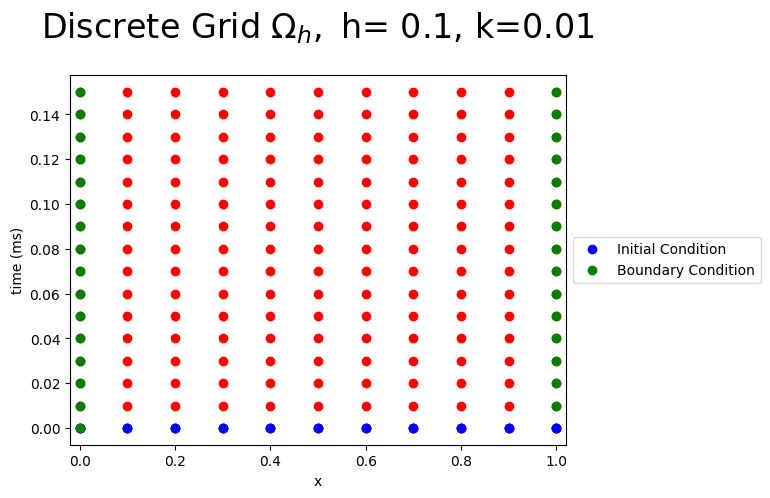

In [2]:
N=10
Nt=100
h=1/N
k=1/Nt
r=k/(h*h)
time_steps=15
time=np.arange(0,(time_steps+.5)*k,k)
x=np.arange(0,1.0001,h)
X, Y = np.meshgrid(x, time)
fig = plt.figure()
plt.plot(X,Y,'ro');
plt.plot(x,0*x,'bo',label='Initial Condition');
plt.plot(np.ones(time_steps+1),time,'go',label='Boundary Condition');
plt.plot(x,0*x,'bo');
plt.plot(0*time,time,'go');
plt.xlim((-0.02,1.02))
plt.xlabel('x')
plt.ylabel('time (ms)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $\Omega_h,$ h= %s, k=%s'%(h,k),fontsize=24,y=1.08)

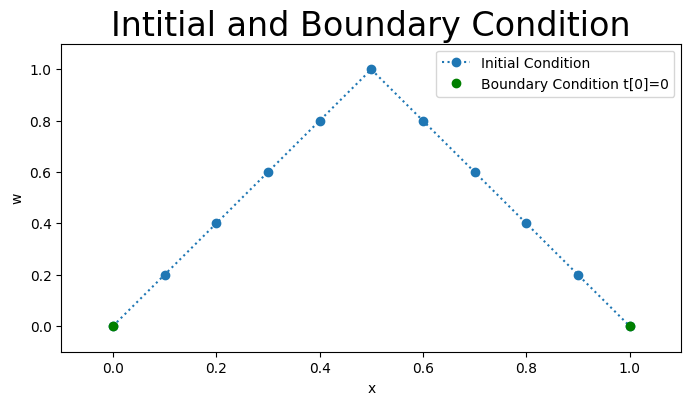

In [3]:
w=np.zeros((N+1,time_steps+1))
b=np.zeros(N-1)
# Initial Condition
for i in range (1,N):
    w[i,0]=2*x[i]
    if x[i]>0.5:
        w[i,0]=2*(1-x[i])
    

# Boundary Condition
for k in range (0,time_steps):
    w[0,k]=0
    w[N,k]=0

fig = plt.figure(figsize=(8,4))
plt.plot(x,w[:,0],'o:',label='Initial Condition')
plt.plot(x[[0,N]],w[[0,N],0],'go',label='Boundary Condition t[0]=0')
#plt.plot(x[N],w[N,0],'go')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Intitial and Boundary Condition',fontsize=24)
plt.xlabel('x')
plt.ylabel('w')
plt.legend(loc='best')
plt.show()

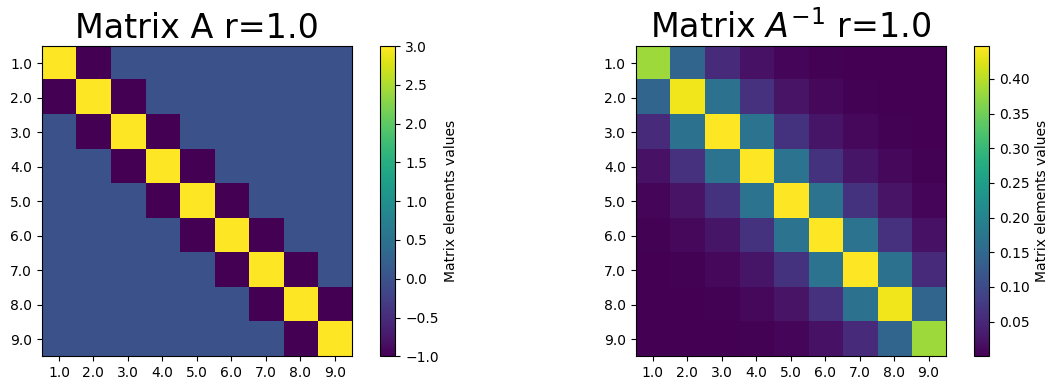

In [4]:
A=np.zeros((N-1,N-1))
for i in range (0,N-1):
    A[i,i]=1+2*r

for i in range (0,N-2):           
    A[i+1,i]=-r
    A[i,i+1]=-r
    
Ainv=np.linalg.inv(A)   
fig = plt.figure(figsize=(12,4));
plt.subplot(121)
plt.imshow(A,interpolation='none');
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1));
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1));
clb=plt.colorbar();
clb.set_label('Matrix elements values');
#clb.set_clim((-1,1));
plt.title('Matrix A r=%s'%(np.round(r,3)),fontsize=24)

plt.subplot(122)
plt.imshow(Ainv,interpolation='none');
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1));
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1));
clb=plt.colorbar();
clb.set_label('Matrix elements values');
#clb.set_clim((-1,1));
plt.title(r'Matrix $A^{-1}$ r=%s'%(np.round(r,3)),fontsize=24)

fig.tight_layout()
plt.show();

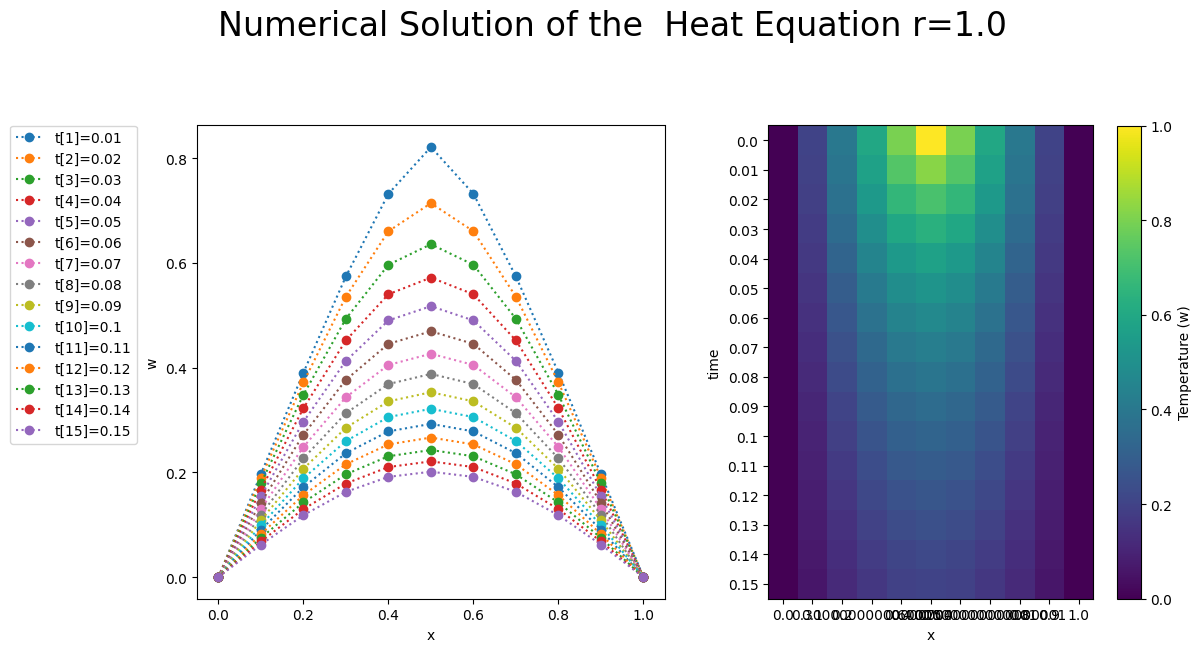

In [5]:
fig = plt.figure(figsize=(12,6))

plt.subplot(121)
for j in range (1,time_steps+1):
    b[0]=r*w[0,j]
    b[N-2]=r*w[N,j]
    w[1:(N),j]=np.dot(Ainv,w[1:(N),j-1]+b)
    plt.plot(x,w[:,j],'o:',label='t[%s]=%s'%(j,time[j]))
plt.xlabel('x')
plt.ylabel('w')
#plt.legend(loc='bottom', bbox_to_anchor=(0.5, -0.1))
plt.legend(bbox_to_anchor=(-.4, 1), loc=2, borderaxespad=0.)

plt.subplot(122)
plt.imshow(w.transpose())
plt.xticks(np.arange(len(x)), x)
plt.yticks(np.arange(len(time)), time)
plt.xlabel('x')
plt.ylabel('time')
clb=plt.colorbar()
clb.set_label('Temperature (w)')
plt.suptitle('Numerical Solution of the  Heat Equation r=%s'%(np.round(r,3)),fontsize=24,y=1.08)
fig.tight_layout()
plt.show()

### References|
[1] G D Smith Numerical Solution of Partial Differential Equations: Finite Difference Method Oxford 1992

[2] Butler, J. (2019). John S Butler Numerical Methods for Differential Equations. [online] Maths.dit.ie. Available at: http://www.maths.dit.ie/~johnbutler/Teaching_NumericalMethods.html [Accessed 14 Mar. 2019].

[3] Wikipedia contributors. (2019, February 22). Heat equation. In Wikipedia, The Free Encyclopedia. Available at: https://en.wikipedia.org/w/index.php?title=Heat_equation&oldid=884580138 [Accessed 14 Mar. 2019].